## Testing notebook for evaluating model performance

In [2]:
import argparse
import dgl
import dgl.function as fn
import torch as th
import torch.nn as nn
import torch.nn.functional as F
import time
import sklearn.model_selection as sk
import numpy as np
from gcn import load_elliptic_data, Net, evaluate, train_gcn_model
from sklearn import metrics
from imblearn.metrics import geometric_mean_score
import matplotlib.pyplot as plt

from dgl import AddSelfLoop
from graphSAGE import SAGE, train_sage_model
from performance import performance_metrics

In [2]:
model = train_gcn_model()

Training with DGL built-in GCN module


/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Epoch 00000 | Loss 410.1149 | Test Acc 0.9016 | Time(s) nan
Epoch 00001 | Loss 101.2159 | Test Acc 0.9016 | Time(s) nan
Epoch 00002 | Loss 137.6065 | Test Acc 0.9016 | Time(s) nan
Epoch 00003 | Loss 163.2938 | Test Acc 0.9016 | Time(s) 0.4273
Epoch 00004 | Loss 183.7825 | Test Acc 0.9017 | Time(s) 0.4264
Epoch 00005 | Loss 192.9055 | Test Acc 0.9017 | Time(s) 0.4249
Epoch 00006 | Loss 191.7369 | Test Acc 0.9017 | Time(s) 0.4257
Epoch 00007 | Loss 181.8551 | Test Acc 0.9017 | Time(s) 0.4246
Epoch 00008 | Loss 164.8024 | Test Acc 0.9017 | Time(s) 0.4239
Epoch 00009 | Loss 142.2092 | Test Acc 0.9016 | Time(s) 0.4241
Epoch 00010 | Loss 114.4856 | Test Acc 0.9009 | Time(s) 0.4240
Epoch 00011 | Loss 82.4506 | Test Acc 0.8974 | Time(s) 0.4247
Epoch 00012 | Loss 46.2322 | Test Acc 0.8182 | Time(s) 0.4257
Epoch 00013 | Loss 6.1009 | Test Acc 0.0989 | Time(s) 0.4262
Epoch 00014 | Loss 1959.8722 | Test Acc 0.3156 | Time(s) 0.4265
Epoch 00015 | Loss 49.3372 | Test Acc 0.8933 | Time(s) 0.4260
Epoch

In [3]:
path_to_data = 'dataset/ellipticGraph'
g, features, num_nodes, feature_dim, train_ids, test_ids, train_labels, test_labels = load_elliptic_data(path_to_data)

In [4]:
model.eval()
with th.no_grad():
    logits = model(g, features)
    logits = logits[test_ids]
    _, indices = th.max(logits, dim=1)

In [5]:
correct = th.sum(indices == test_labels)
correct.item() * 1.0 / len(test_labels)

0.8881133898851068

In [6]:
confusion_matrix = metrics.confusion_matrix(test_labels, indices)

In [7]:
metrics.f1_score(test_labels, indices, average="macro")

0.7079065473941587

In [8]:
metrics.roc_auc_score(test_labels, indices)

0.725181704725429

In [9]:
geometric_mean_score(test_labels, indices)

0.6962541619500834

In [19]:
fpr, tpr, _ = metrics.roc_curve(test_labels, indices)
roc_auc = metrics.roc_auc_score(test_labels, indices)

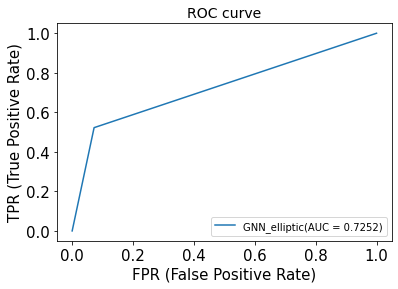

In [21]:
rocCurve = plt.figure()
plt.plot(fpr, tpr, '-', label='GCN' + '_' + 'elliptic' + '(AUC = %0.4f)' % roc_auc)
plt.title('ROC curve', fontsize=14)
plt.xlabel('FPR (False Positive Rate)', fontsize=15)
plt.ylabel('TPR (True Positive Rate)', fontsize=15)
plt.legend(loc='lower right')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

## Graph SAGE

In [3]:
model = train_sage_model()

Training graphSAGE model...
Done Training


In [4]:
g, features, num_nodes, feature_dim, train_ids, test_ids, train_labels, test_labels = load_elliptic_data(
            'dataset/ellipticGraph')
performance_metrics(model, g, features, test_labels, test_ids)

(0.6761507970572151, 0.6228423499219824, 0.49665985670772006)

In [6]:
gcn_model = train_gcn_model()
performance_metrics(gcn_model, g, features, test_labels, test_ids)

Training with DGL built-in GCN module
Model Done Training


(0.7316635935685217, 0.7285494941765561, 0.6941955006801486)

In [7]:
import pandas as pd

In [10]:
pd.DataFrame({"1":[1, 2, 3], "2":[4, 5, 6]}, index=["row1", "row2", "row3"])

,1,2
row1,1,4
row2,2,5
row3,3,6
